# TASK 2 ----- DIABETES PREDICTION

# Importing Libraries

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
#Loading Dataset
df=pd.read_csv("diabetes.csv")

In [3]:
pd.set_option("display.max_rows",None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
#check the summary stastistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Check the missing Values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Now, let’s check that how well our outcome column is balanced

0    500
1    268
Name: Outcome, dtype: int64


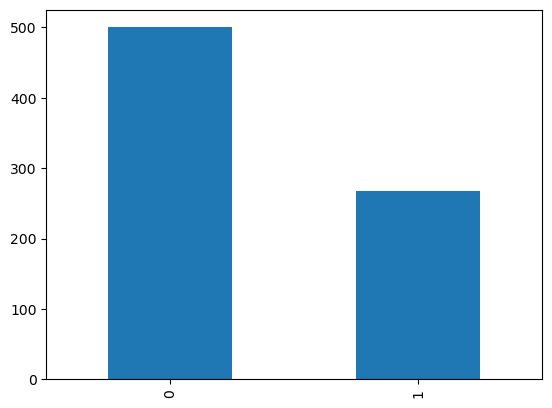

In [11]:
c = {1: "#0392cf", 2: "#7bc043"}
colors = df["Outcome"].map(lambda x: c.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

# Separate data into dependent and target variable

In [12]:
X=df.iloc[:,:-1]
X[:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
Y=df.iloc[:,-1]
Y[:5]

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Splitting Dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

# Data Conversion

In [15]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

# Model Creation

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()
lg.fit(X_train_ss,Y_train)
Y_pred1=lg.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred1))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred1))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred1))

confusion_matrix :  [[91  8]
 [21 34]]
score :  0.8116883116883117
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        99
           1       0.81      0.62      0.70        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.80       154



# DecisionTree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train_ss,Y_train)
Y_pred2=dtc.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred2))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred2))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred2))

confusion_matrix :  [[83 16]
 [19 36]]
score :  0.7727272727272727
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# K Nearest neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(X_train_ss,Y_train)
Y_pred3=knn.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred3))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred3))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred3))

confusion_matrix :  [[81 18]
 [20 35]]
score :  0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# Support Vector Machine

In [19]:
from sklearn.svm import SVC

sv=SVC()
sv.fit(X_train_ss,Y_train)
Y_pred4=knn.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred4))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred4))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred4))

confusion_matrix :  [[81 18]
 [20 35]]
score :  0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



# RandomForest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rr=RandomForestClassifier(n_estimators=200)
rr.fit(X_train_ss,Y_train)
Y_pred5=rr.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred5))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred5))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred5))

confusion_matrix :  [[86 13]
 [18 37]]
score :  0.7987012987012987
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154



# Xgboost

In [21]:
import xgboost as xgb

Xgb=xgb.XGBClassifier()
Xgb.fit(X_train_ss,Y_train)
Y_pred6=Xgb.predict(X_test_ss)

from sklearn.metrics import confusion_matrix
print("confusion_matrix : ",confusion_matrix(Y_test,Y_pred6))

from sklearn.metrics import accuracy_score
print("score : ",accuracy_score(Y_test,Y_pred6))

from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred6))

confusion_matrix :  [[80 19]
 [21 34]]
score :  0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



# Evaluation

In [22]:
result=pd.DataFrame({
    "Model": ["Logistic Regression","Decision Tree","KNN","SVC","Random Forest","Xgboost"],
    "Score": [0.811,0.785,0.753,0.753,0.818,0.74]})

results = result.sort_values(by="Score",ascending=False)
results = results.set_index("Model")
results

,Score
Model,
Random Forest,0.818
Logistic Regression,0.811
Decision Tree,0.785
KNN,0.753
SVC,0.753
Xgboost,0.740


The Conclusion from Model Building
Therefore Random forest is the best model for this prediction since it has an accuracy_score of 0.818

<AxesSubplot:>

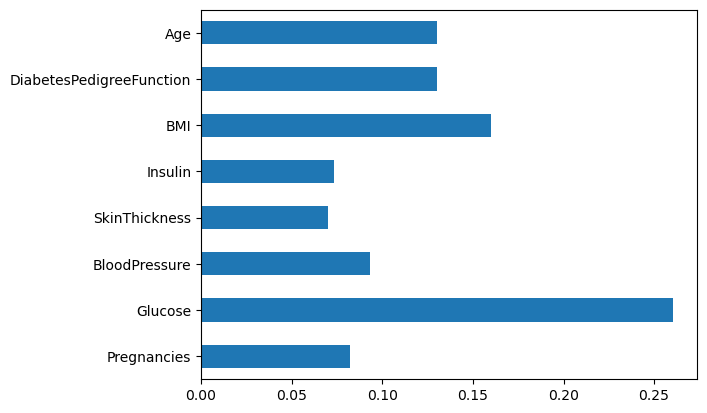

In [23]:
#Plotting feature importances

(pd.Series(rr.feature_importances_, index=X.columns).plot(kind='barh'))

Here from the above graph, it is clearly visible that Glucose as a feature is the most important in this dataset.

# Predict Diabetes

In [24]:
x=np.array(X.loc[[14]])
x

array([[  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])

In [25]:
pred=rr.predict(x)
if pred[0]==0:
    print("Patient has Diabetes")
else:
    print("Patient has not Diabetes")

Patient has not Diabetes


In [26]:
Y_test[14]

1

# Thank You !!